# **ChefBot**

สมาชิกกลุ่ม 1

1. ก้องภพ ทองดี 63340500003 
2. ภคพล ลีลาคหกิจ 63340500045
3. สรพัศ วีระกุล 63340500064
4. อธิเมศร์  เอี๊ยวเจริญ 63340500068 

# **Import Library**

In [3]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import tensorflow as tf
print(tf. __version__) 
print(tf.config.list_physical_devices('GPU'))

import matplotlib as mpl
import matplotlib.font_manager as fm

fm.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

np.random.seed(0)
global_seed = 0

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **Modeling**

In [4]:
# Train model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from time import time
from datetime import timedelta
import keras
from keras.models import load_model
import os

from keras.utils import plot_model

# Build model
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,LSTM, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten,GlobalMaxPooling1D
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras import backend as K                                                          
from keras.callbacks import ModelCheckpoint, TensorBoard

# Classifications report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

## **Preset1**

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 300)]    0           []                               
                                                                                                  
 masking (Masking)              (None, 50, 300)      0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 48, 32)       28832       ['masking[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 48, 64)       16640       ['conv1d[0][0]']                 
                                                                                              

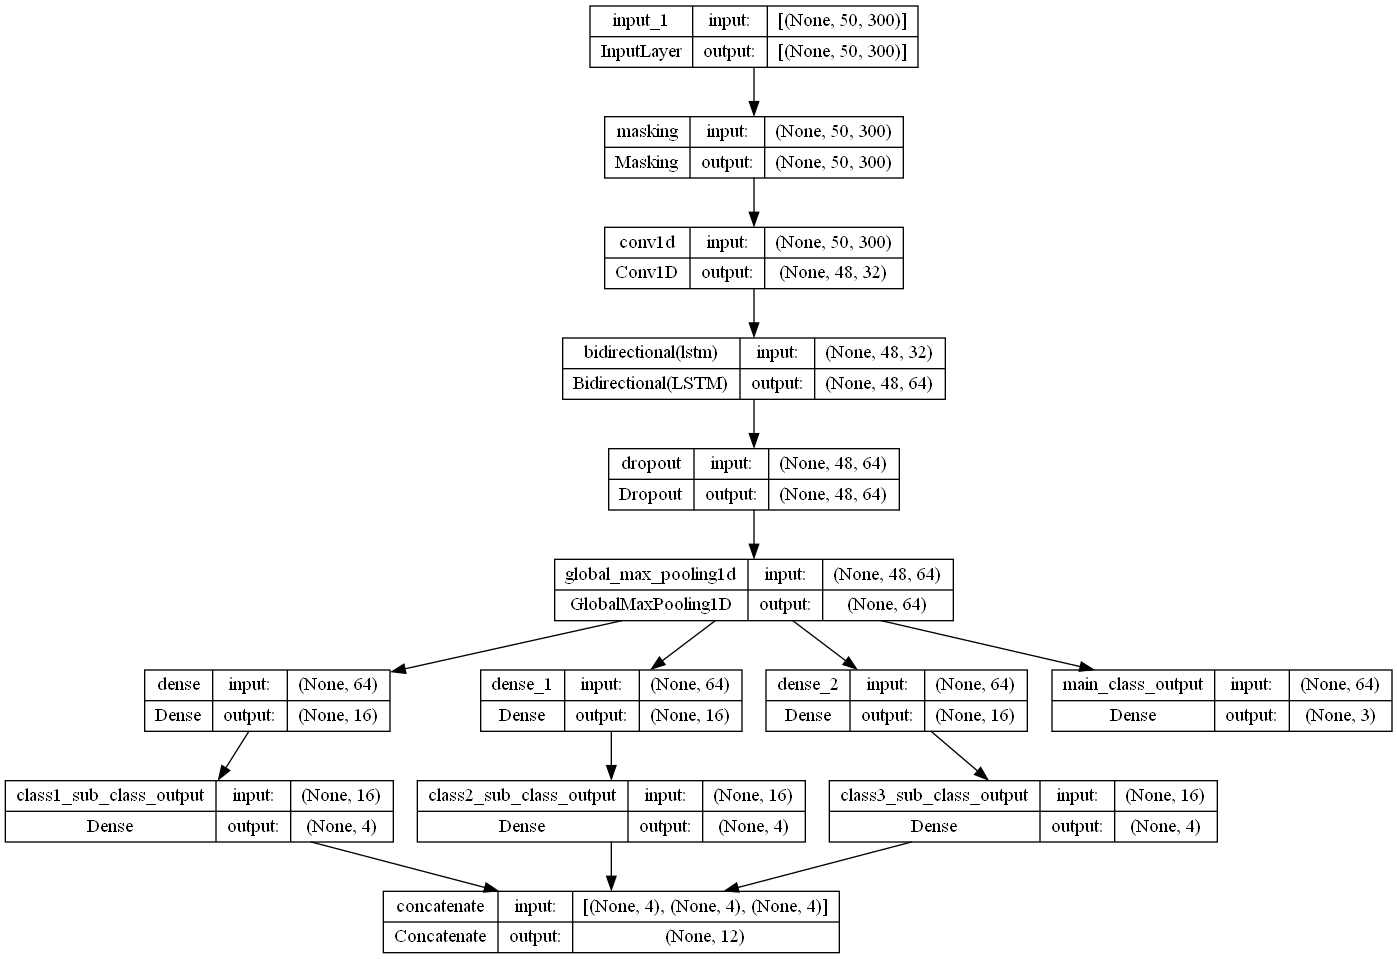

In [5]:
max_len = 50
word_vector_size = 300
main_class_label = ['class1', 'class2', 'class3']
sub_class_label = {'class1': ['sub11', 'sub12', 'sub13', 'sub14'],
                'class2': ['sub21', 'sub22', 'sub23', 'sub24'],
                'class3': ['sub31', 'sub32', 'sub33', 'sub34']}

input_layer = Input(shape=(max_len, word_vector_size), dtype='float32')
masking_layer = Masking(mask_value=0.0)(input_layer)
conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(masking_layer)
bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(conv1d_layer_1)
dropout_layer_1 = Dropout(0.2)(bi_lstm_layer_1)
global_max_pooling_layer_1 = GlobalMaxPooling1D()(dropout_layer_1)
# Main class output
main_class_output_layer = Dense(len(main_class_label), activation='softmax', name='main_class_output')(global_max_pooling_layer_1)
# Sub class output
# Define a dictionary to hold the sub-class output layers for each main class
sub_class_output_layers = {}

for main_class in main_class_label:
   # Dense layer
   dense_layer = Dense(16, activation='relu')(global_max_pooling_layer_1)
   # Sub class output
   sub_class_output_layer = Dense(len(sub_class_label[main_class]), activation='softmax', name=main_class+'_sub_class_output')(dense_layer)
   # Add the sub class output layer to the dictionary
   sub_class_output_layers[main_class] = sub_class_output_layer
   
# Concatenate the sub class output layers
concatenated_layer = Concatenate()(list(sub_class_output_layers.values()))

# Define the model
model = Model(inputs=input_layer, outputs=[main_class_output_layer,concatenated_layer])
         
loss = {'main_class_output': 'categorical_crossentropy',
         'sub_class_output': 'categorical_crossentropy'}
loss_weights = {'main_class_output': 1.0,
                'sub_class_output': 1.0}
metrics = {'main_class_output': 'accuracy',
            'sub_class_output': 'accuracy'}
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, loss_weights=loss_weights, metrics=metrics)
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## **Preset2**

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 50, 300)]    0           []                               
                                                                                                  
 masking_2 (Masking)            (None, 50, 300)      0           ['input_3[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 48, 32)       28832       ['masking_2[0][0]']              
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 48, 64)      16640       ['conv1d_2[0][0]']               
 )                                                                                          

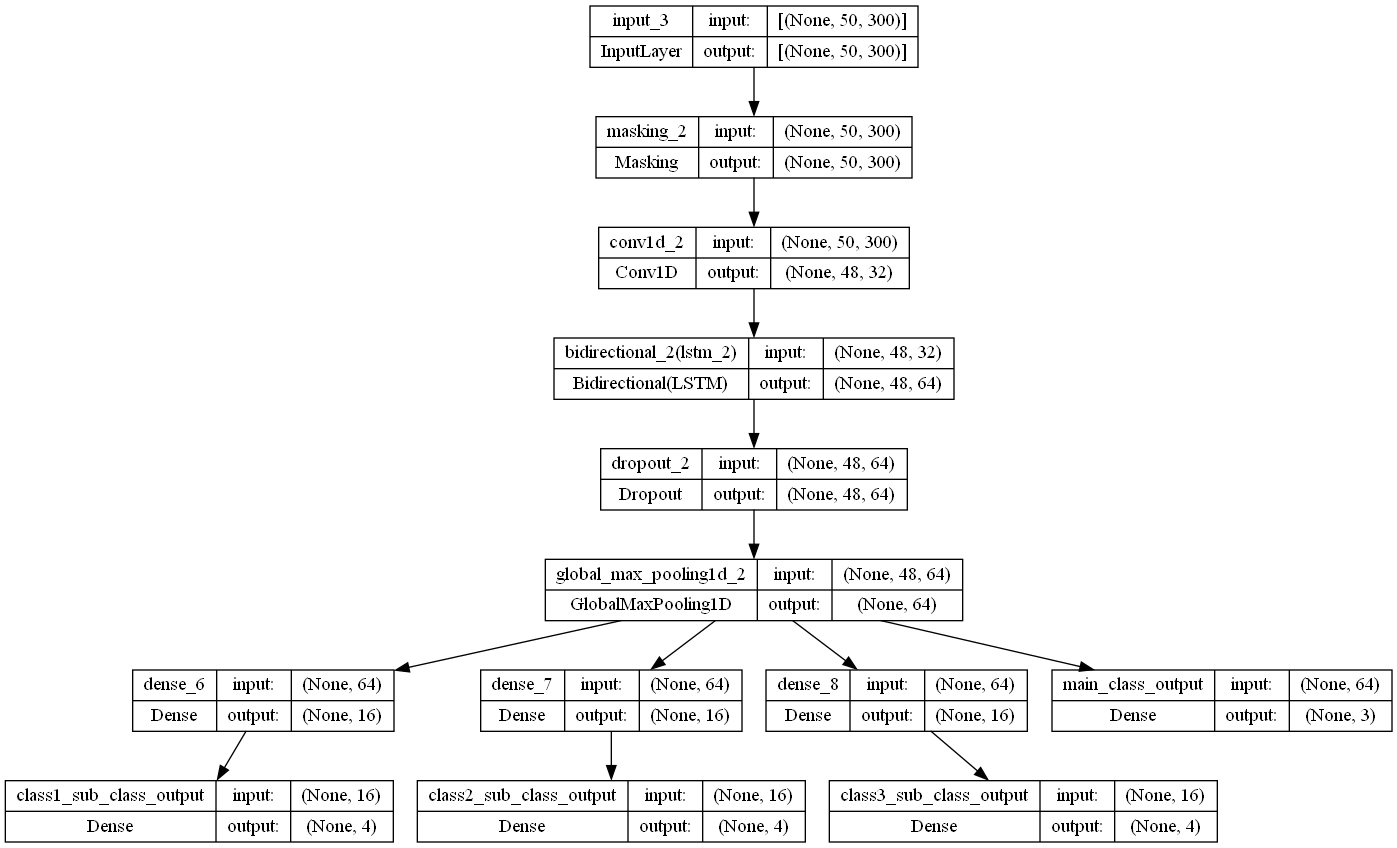

In [7]:
max_len = 50
word_vector_size = 300
main_class_label = ['class1', 'class2', 'class3']
sub_class_label = {'class1': ['sub11', 'sub12', 'sub13', 'sub14'],
                'class2': ['sub21', 'sub22', 'sub23', 'sub24'],
                'class3': ['sub31', 'sub32', 'sub33', 'sub34']}

input_layer = Input(shape=(max_len, word_vector_size), dtype='float32')
masking_layer = Masking(mask_value=0.0)(input_layer)
conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(masking_layer)
bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(conv1d_layer_1)
dropout_layer_1 = Dropout(0.2)(bi_lstm_layer_1)W
global_max_pooling_layer_1 = GlobalMaxPooling1D()(dropout_layer_1)
# Main class output
main_class_output_layer = Dense(len(main_class_label), activation='softmax', name='main_class_output')(global_max_pooling_layer_1)
# Sub class output
# Define a dictionary to hold the sub-class output layers for each main class
sub_class_output_layers = {}

for main_class in main_class_label:
   # Dense layer
   dense_layer = Dense(16, activation='relu')(global_max_pooling_layer_1)
   # Sub class output
   sub_class_output_layer = Dense(len(sub_class_label[main_class]), activation='softmax', name=main_class+'_sub_class_output')(dense_layer)
   # Add the sub class output layer to the dictionary
   sub_class_output_layers[main_class] = sub_class_output_layer
   
# Define the model
model = Model(inputs=input_layer, outputs=[main_class_output_layer, sub_class_output_layers['class1'], sub_class_output_layers['class2'], sub_class_output_layers['class3']])

loss = {'main_class_output': 'categorical_crossentropy',
                'class1_sub_class_output': 'categorical_crossentropy',
                'class2_sub_class_output': 'categorical_crossentropy',
                'class3_sub_class_output': 'categorical_crossentropy'}
loss_weights = {'main_class_output': 1.0,
                        'class1_sub_class_output': 1.0,
                        'class2_sub_class_output': 1.0,
                        'class3_sub_class_output': 1.0}
metrics = {'main_class_output': 'accuracy',
                     'class1_sub_class_output': 'accuracy',
                        'class2_sub_class_output': 'accuracy',
                        'class3_sub_class_output': 'accuracy'}
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, loss_weights=loss_weights, metrics=metrics)
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)